<a href="https://colab.research.google.com/github/Sneha0112/WalmartStoreAnalysis/blob/main/WalmartAnalysisEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fasteda

  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=0752a648707ae6325ed995a598afc6fd7f303bdb191f84dfce5c207452f91812
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [ ]:
!pip install datacleaner

  Preparing metadata (setup.py) ... done
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7408 sha256=e594fd6f5d86fd65135f5d4641c1bb5add4d1dde5c902eaab57c902a696342e1
  Stored in directory: /root/.cache/pip/wheels/8f/bc/5b/f7ca5772f61851334a8580f3ede175b92a7122eef3464e2b3d
Successfully built datacleaner


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from datacleaner import autoclean
from fasteda import fast_eda
import datacleaner

import scipy
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Data** **Inspection**

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


**Data Cleaning and Data Processing**

In [ ]:
df = df.rename(columns = {
    "Store": "X1",
    "Date": "X2",
    "Weekly_Sales": "Y",
    "Holiday_Flag": "X3",
    "Temperature": "X4",
    "Fuel_Price": "X5",
    "CPI": "X6",
    "Unemployment": "X7"
})
df.head()

,X1,X2,Y,X3,X4,X5,X6,X7
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df=autoclean(df)

In [ ]:
df.head()

,X1,X2,Y,X3,X4,X5,X6,X7
0,1,19,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,52,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,85,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,118,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,20,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.describe()

,X1,X2,Y,X3,X4,X5,X6,X7
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,71.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,41.282743,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,35.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,71.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,107.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,142.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
#missing values
df.isnull().sum()

X1    0
X2    0
Y     0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

In [ ]:
#duplicates
df.duplicated().sum()

0

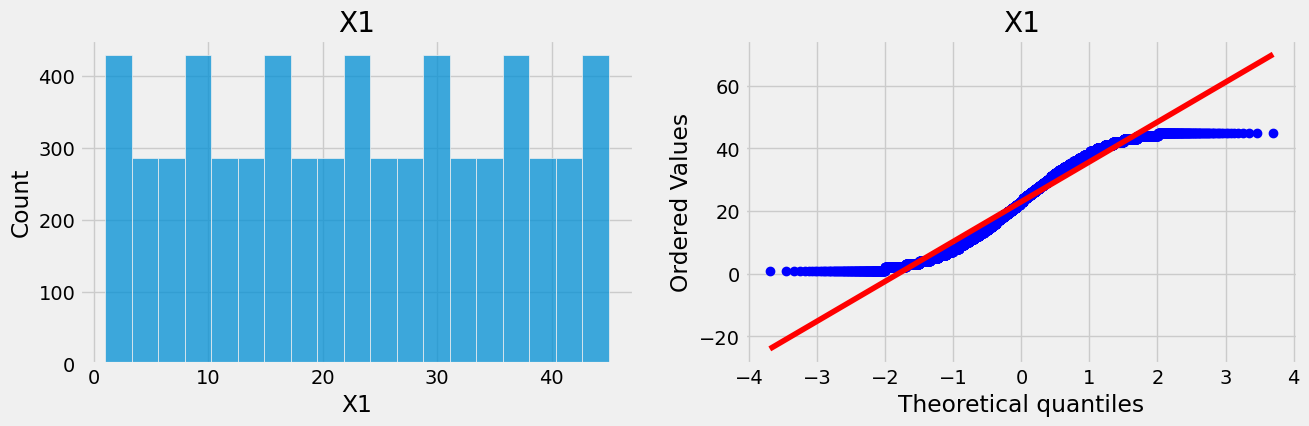

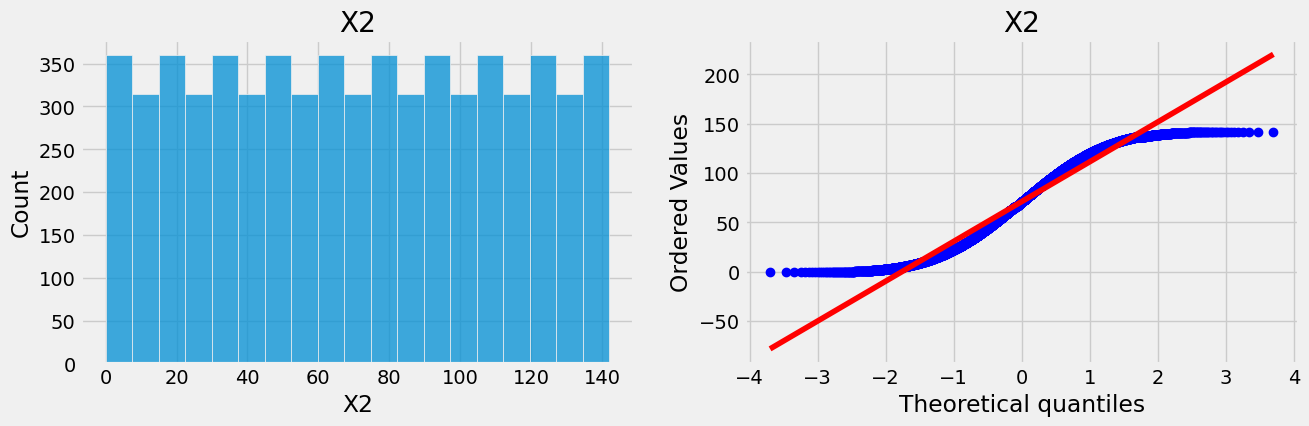

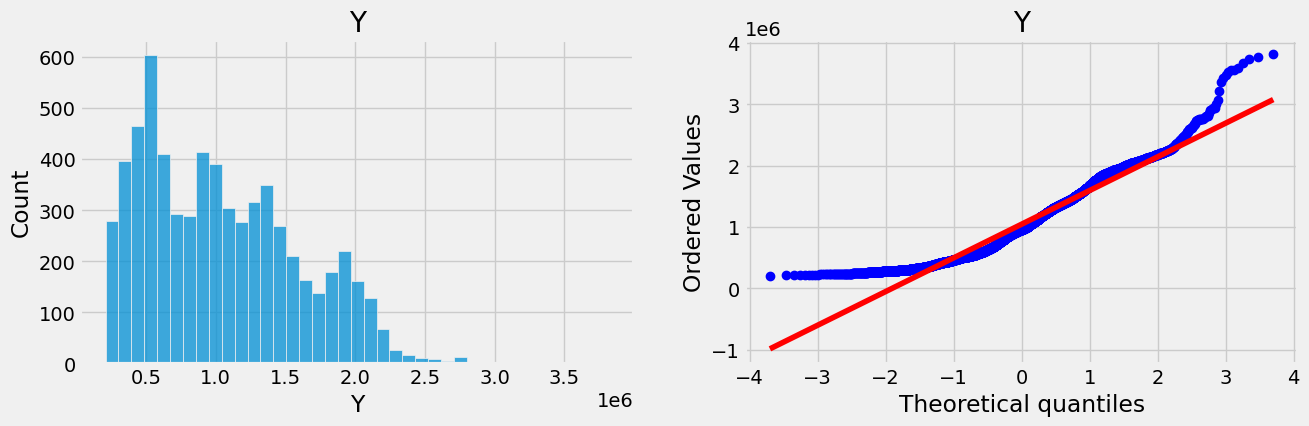

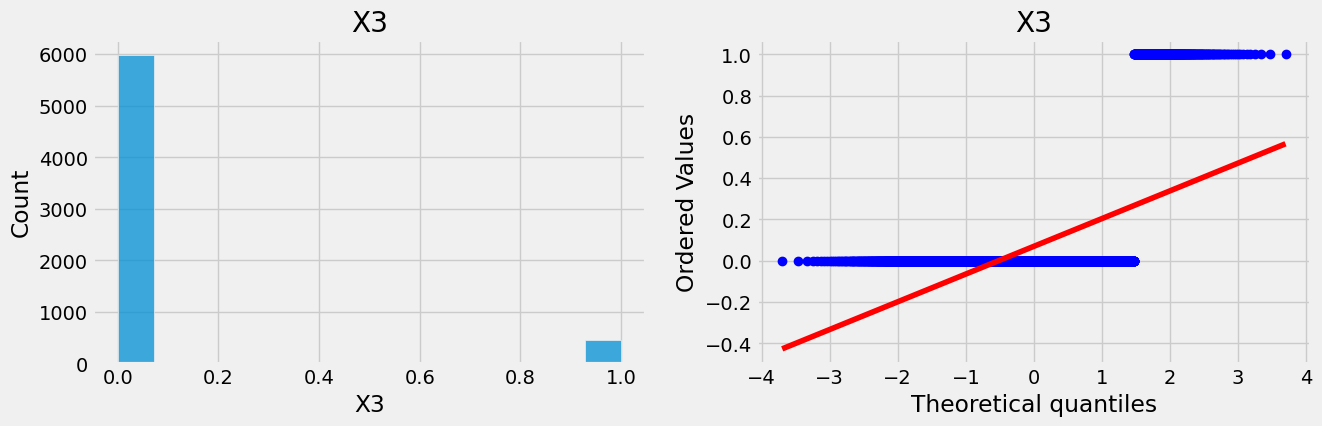

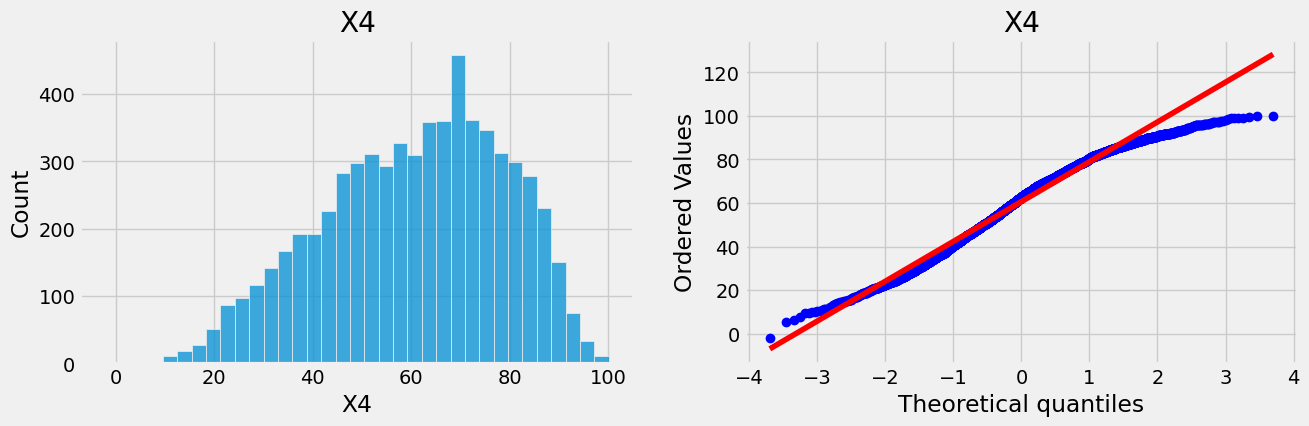

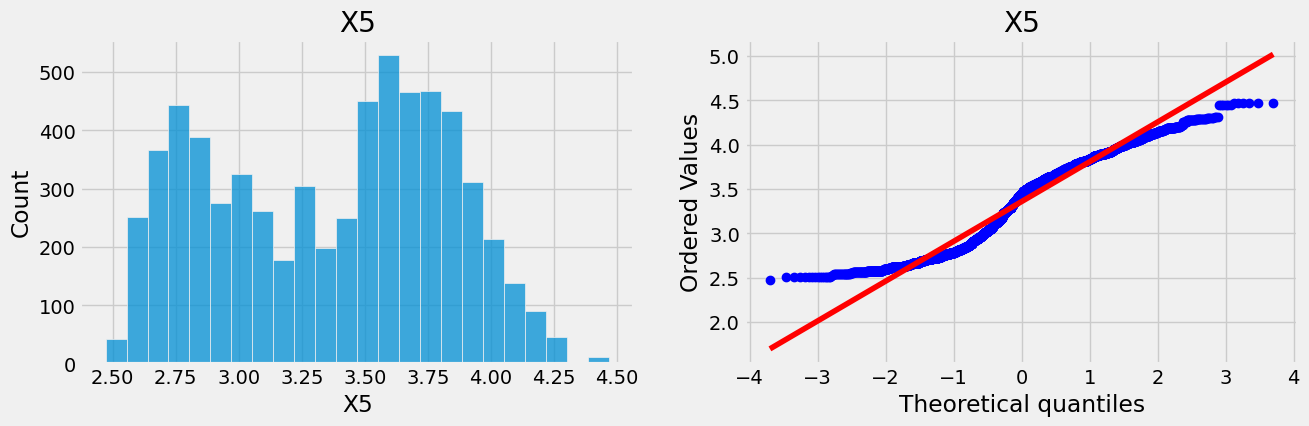

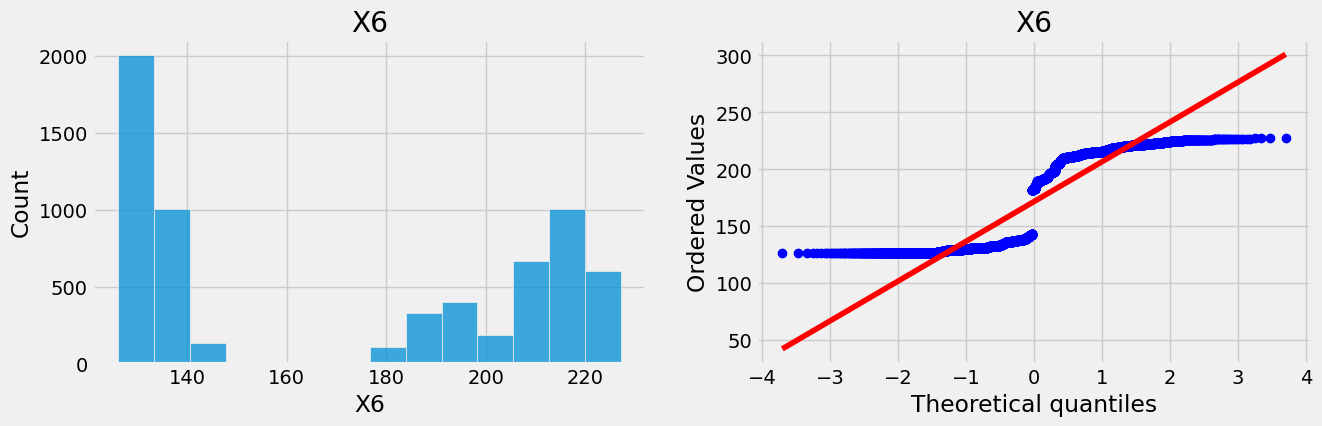

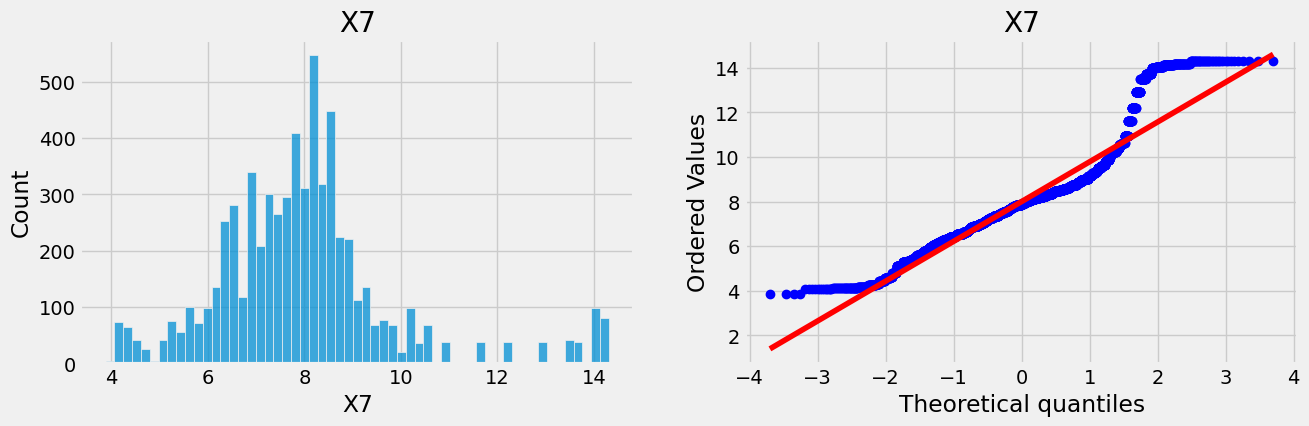

In [ ]:
for i in df.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.histplot(df[i])
  plt.title(i)

  plt.subplot(122)
  stats.probplot(df[i],dist = 'norm', plot = plt)
  plt.title(i)
  plt.show()


In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

for col in df.columns:
    df[col] = df[col] = qt.fit_transform(pd.DataFrame(df[col]))

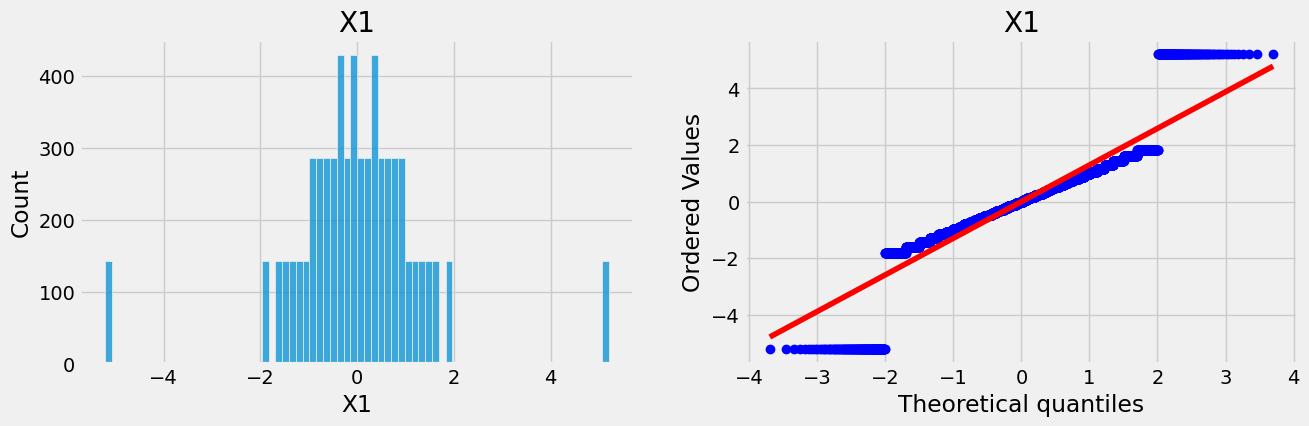

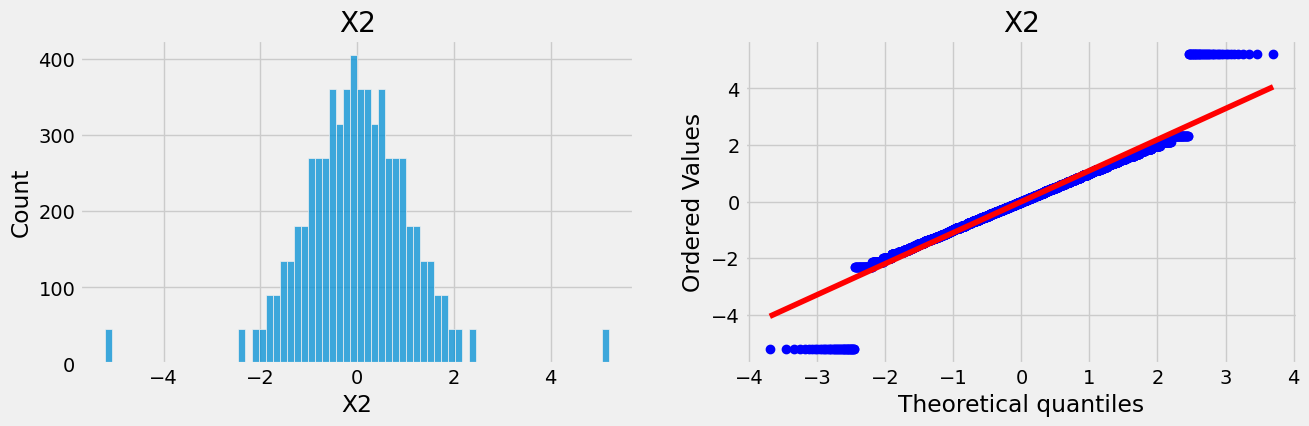

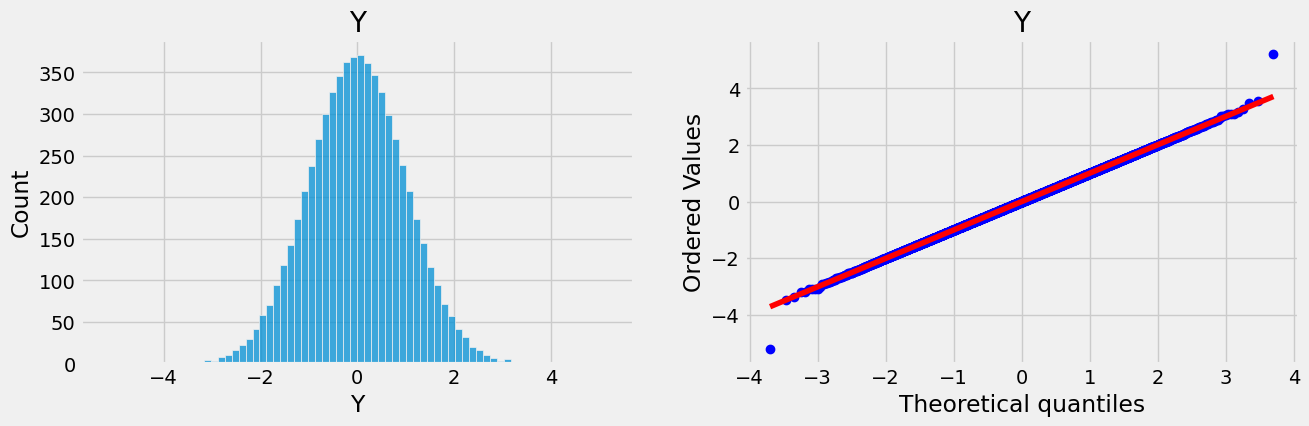

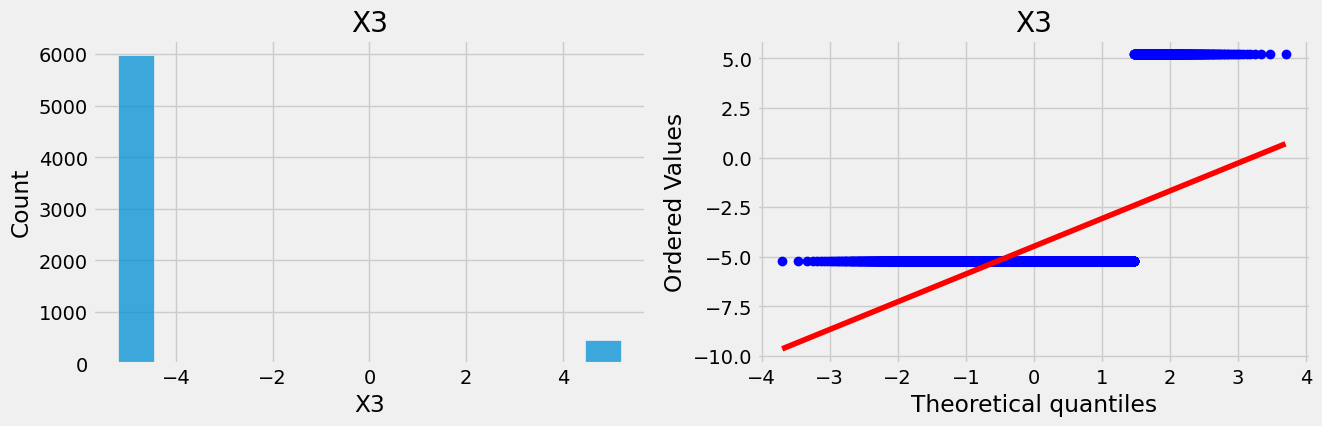

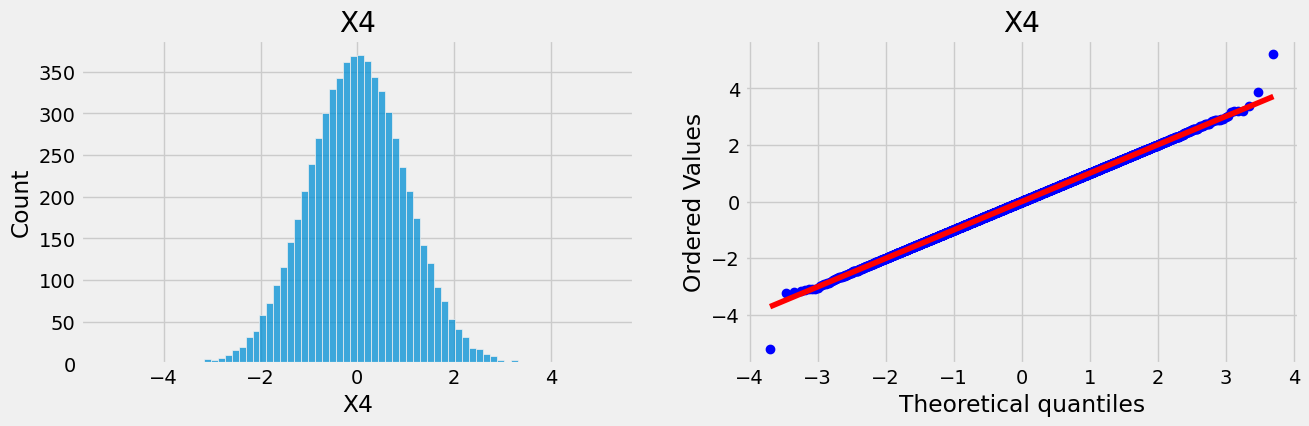

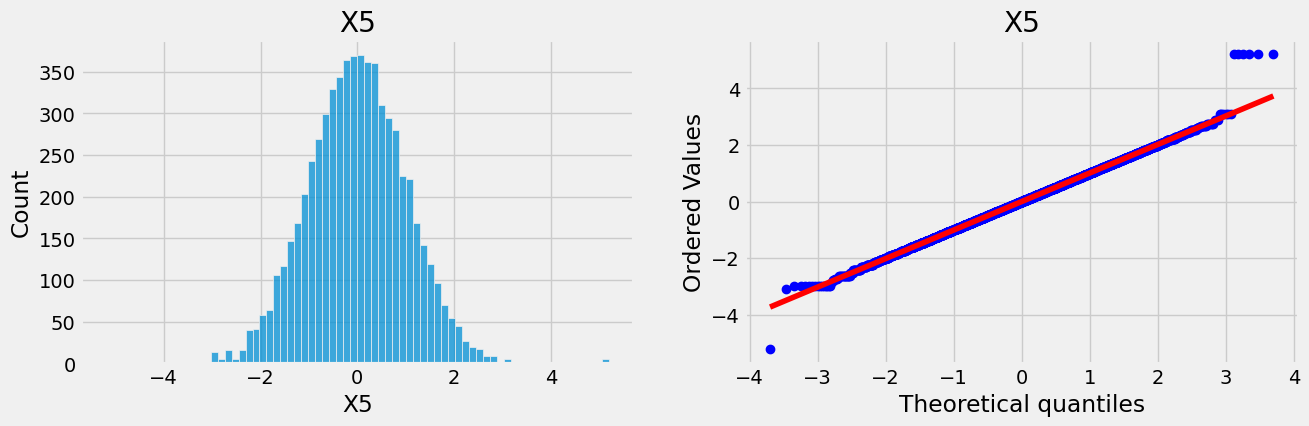

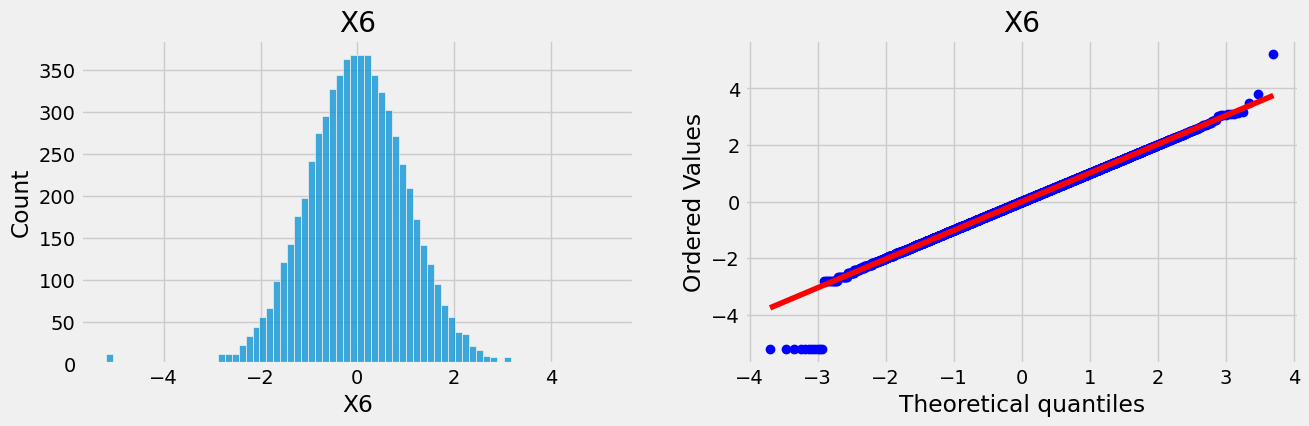

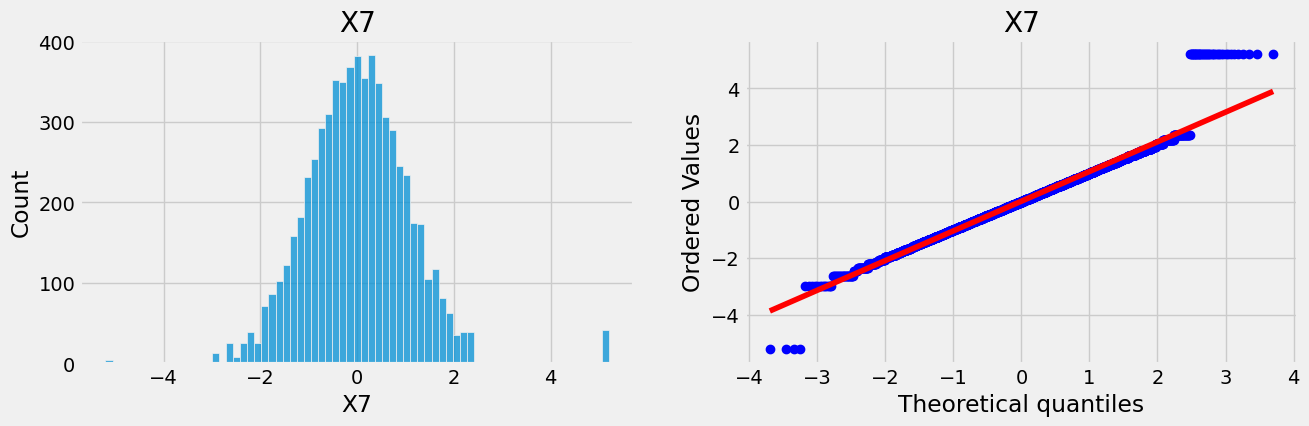

In [ ]:
for column in df.columns :
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(df[column])
    plt.title(column)

    plt.subplot(122)
    stats.probplot(df[column],dist = 'norm', plot = plt)
    plt.title(column)
    plt.show()

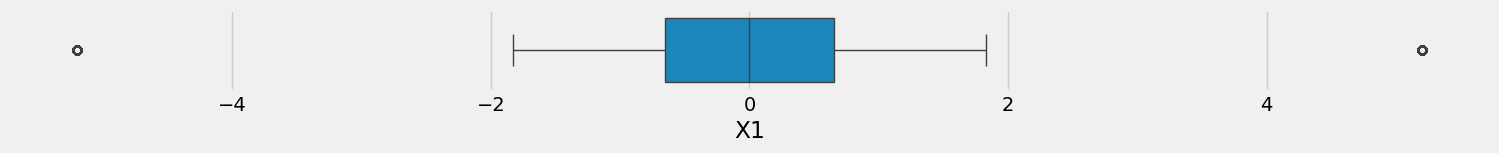

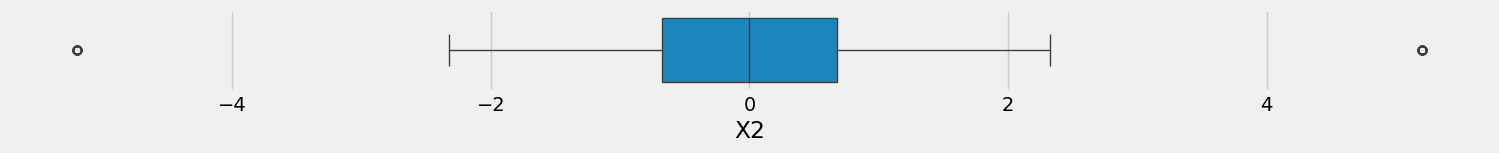

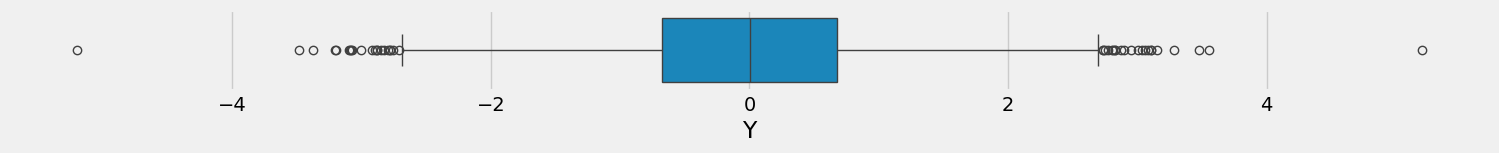

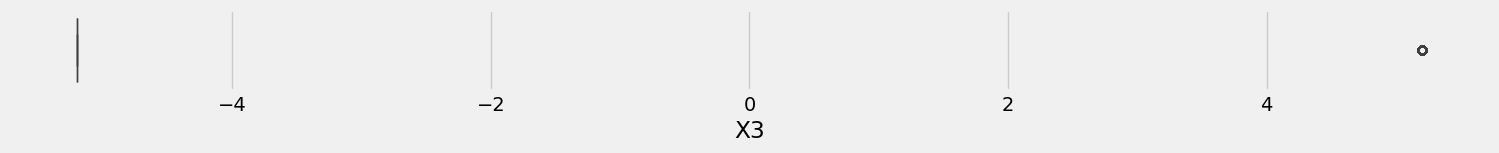

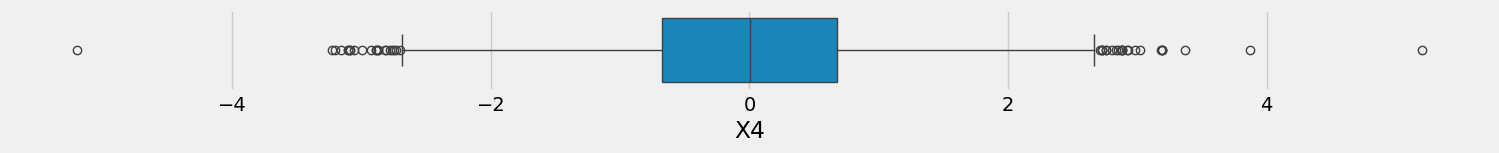

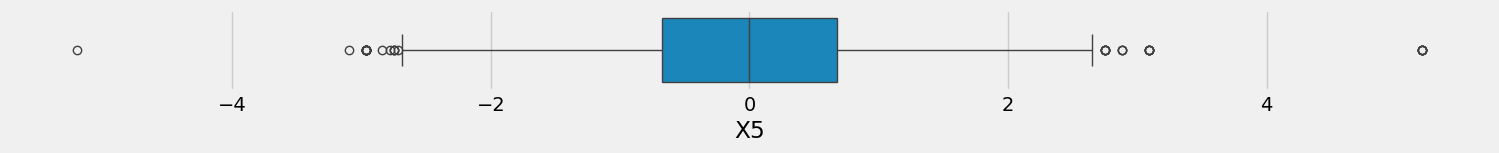

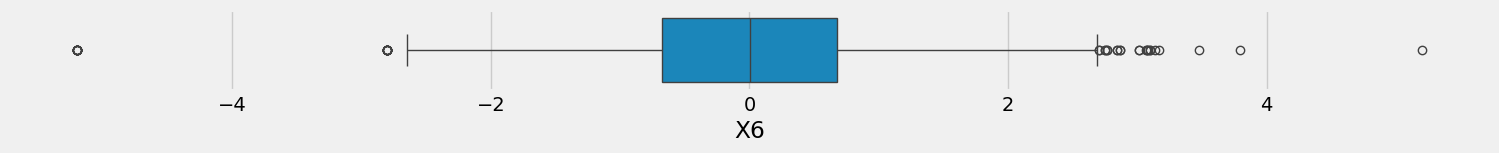

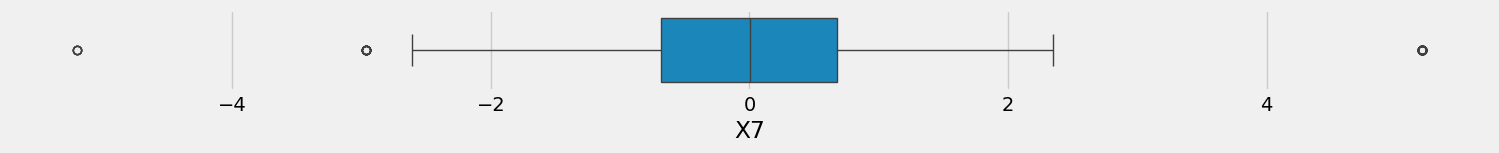

In [ ]:
#outliers
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df, x = column)

In [ ]:
for col in df:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + whisker_width * iqr
    df[col] = np.where(df[col] > upper_whisker, upper_whisker, np.where(df[col] < lower_whisker, lower_whisker, df[col]))

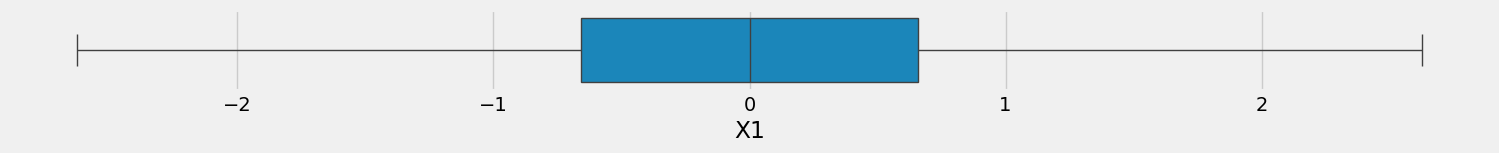

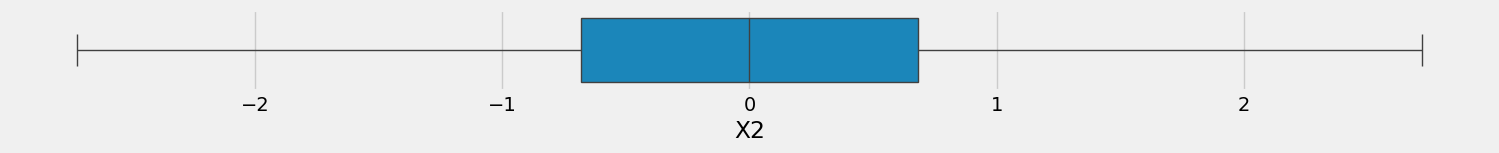

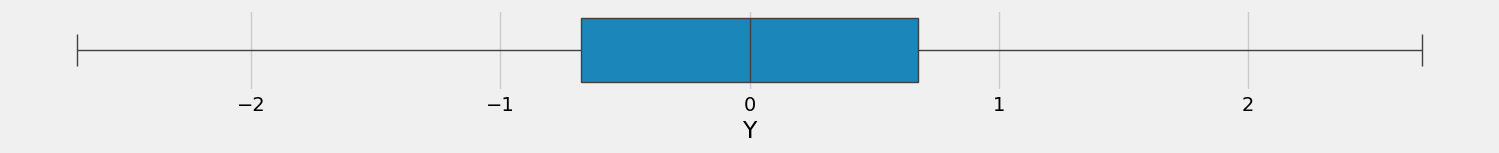

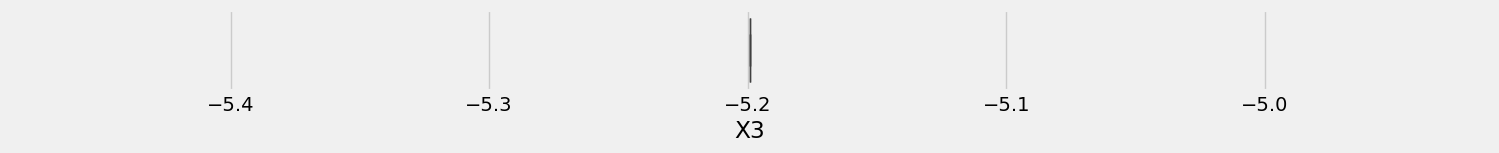

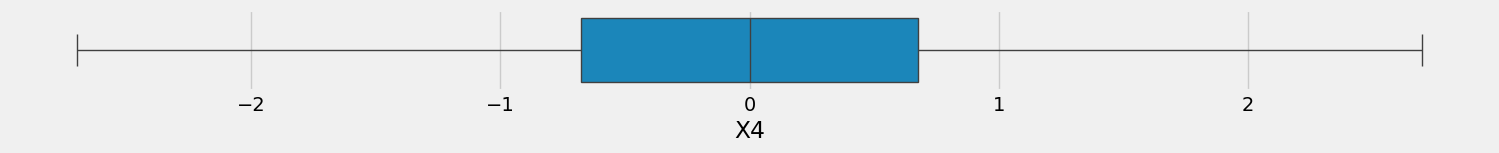

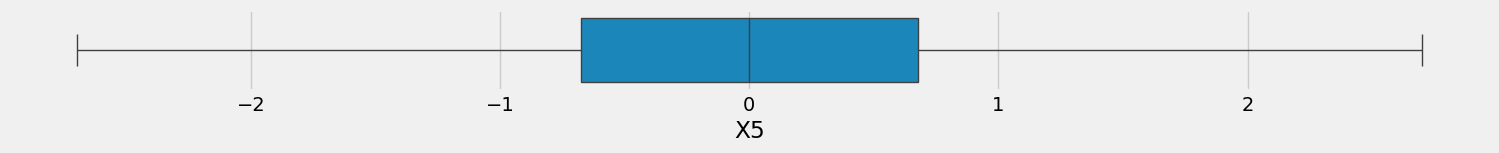

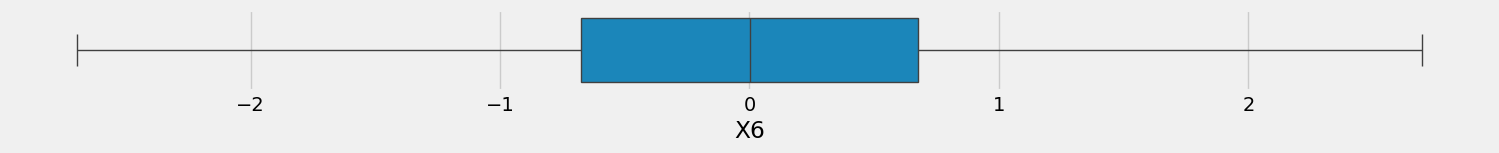

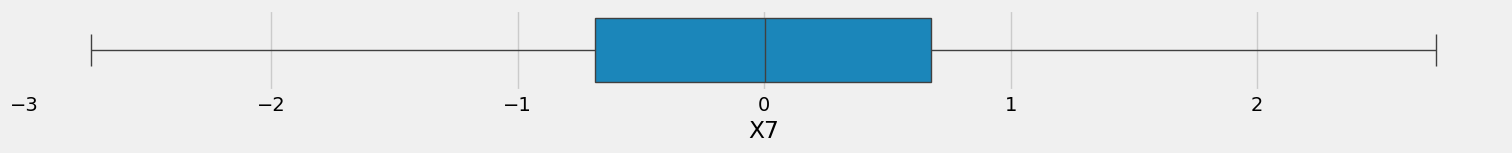

In [ ]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df, x = column)

In [ ]:
df.head()

,X1,X2,Y,X3,X4,X5,X6,X7
0,-2.625944,-1.097845,0.968552,-5.199338,-0.918425,-2.225823,0.556397,0.181652
1,-2.625944,-0.338834,0.966361,-5.199338,-1.081691,-2.611712,0.577791,0.181652
2,-2.625944,0.247134,0.928203,-5.199338,-1.027247,-2.697172,0.584381,0.181652
3,-2.625944,0.949547,0.654040,-5.199338,-0.710236,-2.432017,0.586974,0.181652
4,-2.625944,-1.066304,0.866120,-5.199338,-0.719081,-1.780005,0.589295,0.181652


In [ ]:
df.describe()

,X1,X2,Y,X3,X4,X5,X6,X7
count,6435.000000,6.435000e+03,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,0.000000,-1.197350e-17,-0.000004,-5.199338e+00,0.000044,0.000037,-0.000018,0.000283
std,1.022849,9.985283e-01,0.994076,1.776495e-15,0.994252,0.993872,0.994128,0.995743
min,-2.625944,-2.720050e+00,-2.698231,-5.199338e+00,-2.698179,-2.697172,-2.695098,-2.729556
25%,-0.656486,-6.800126e-01,-0.674645,-5.199338e+00,-0.674687,-0.673702,-0.673702,-0.684763
50%,0.000000,0.000000e+00,0.000174,-5.199338e+00,0.000135,-0.001255,0.000124,0.002509
75%,0.656486,6.800126e-01,0.674412,-5.199338e+00,0.674308,0.675277,0.673894,0.678433
max,2.625944,2.720050e+00,2.697997,-5.199338e+00,2.697801,2.698747,2.695290,2.723226


In [ ]:
df = df.drop("X2", axis = 1)

DataFrame Head:


,X1,Y,X3,X4,X5,X6,X7
0,-2.625944,0.968552,-5.199338,-0.918425,-2.225823,0.556397,0.181652
1,-2.625944,0.966361,-5.199338,-1.081691,-2.611712,0.577791,0.181652
2,-2.625944,0.928203,-5.199338,-1.027247,-2.697172,0.584381,0.181652


DataFrame Tail:


,X1,Y,X3,X4,X5,X6,X7
6432,2.625944,-0.338591,-5.199338,-0.347979,1.525529,0.179215,0.715218
6433,2.625944,-0.362004,-5.199338,-0.268583,1.424462,0.179500,0.715218
6434,2.625944,-0.309951,-5.199338,-0.164726,1.132898,0.177806,0.715218


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(6435, 7)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6435 non-null   float64
 1   Y       6435 non-null   float64
 2   X3      6435 non-null   float64
 3   X4      6435 non-null   float64
 4   X5      6435 non-null   float64
 5   X6      6435 non-null   float64
 6   X7      6435 non-null   float64
dtypes: float64(7)
memory usage: 352.0 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:76: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_ = df._get_numeric_data().dropna().apply(lambda x: skew(x)).to_frame(name = "skewness")
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt_ = df._get_numeric_data().dropna().apply(lambda x: kurtosis(x)).to_frame(name = "kurtosis")


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
X1,6435,0,0,1.023,-2.626,-0.656,0,0.656,2.626,-0.000000,0.159117
Y,6435,-0,0,0.994,-2.698,-0.675,0,0.674,2.698,0.000018,-0.159818
X3,6435,-5.199,-5.199,0,-5.199,-5.199,-5.199,-5.199,-5.199,nan,nan
X4,6435,0,0,0.994,-2.698,-0.675,0,0.674,2.698,0.000660,-0.157393
X5,6435,0,-0.001,0.994,-2.697,-0.674,-0.001,0.675,2.699,0.000273,-0.161514
X6,6435,-0,0,0.994,-2.695,-0.674,0,0.674,2.695,-0.000408,-0.159286
X7,6435,0,0.003,0.996,-2.73,-0.685,0.003,0.678,2.723,0.005435,-0.131723


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



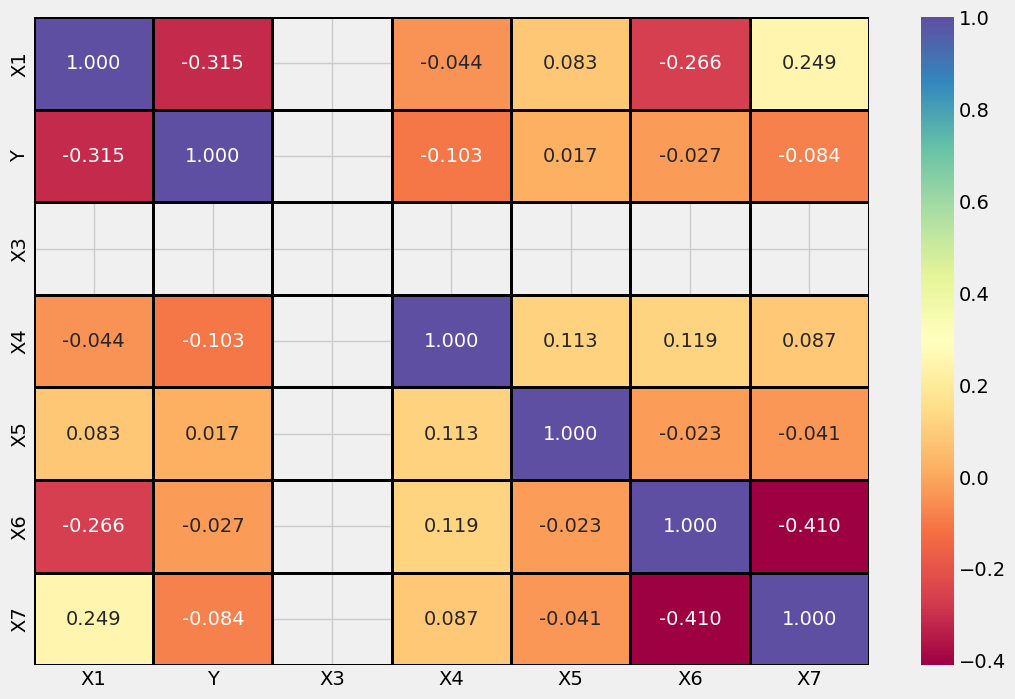

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



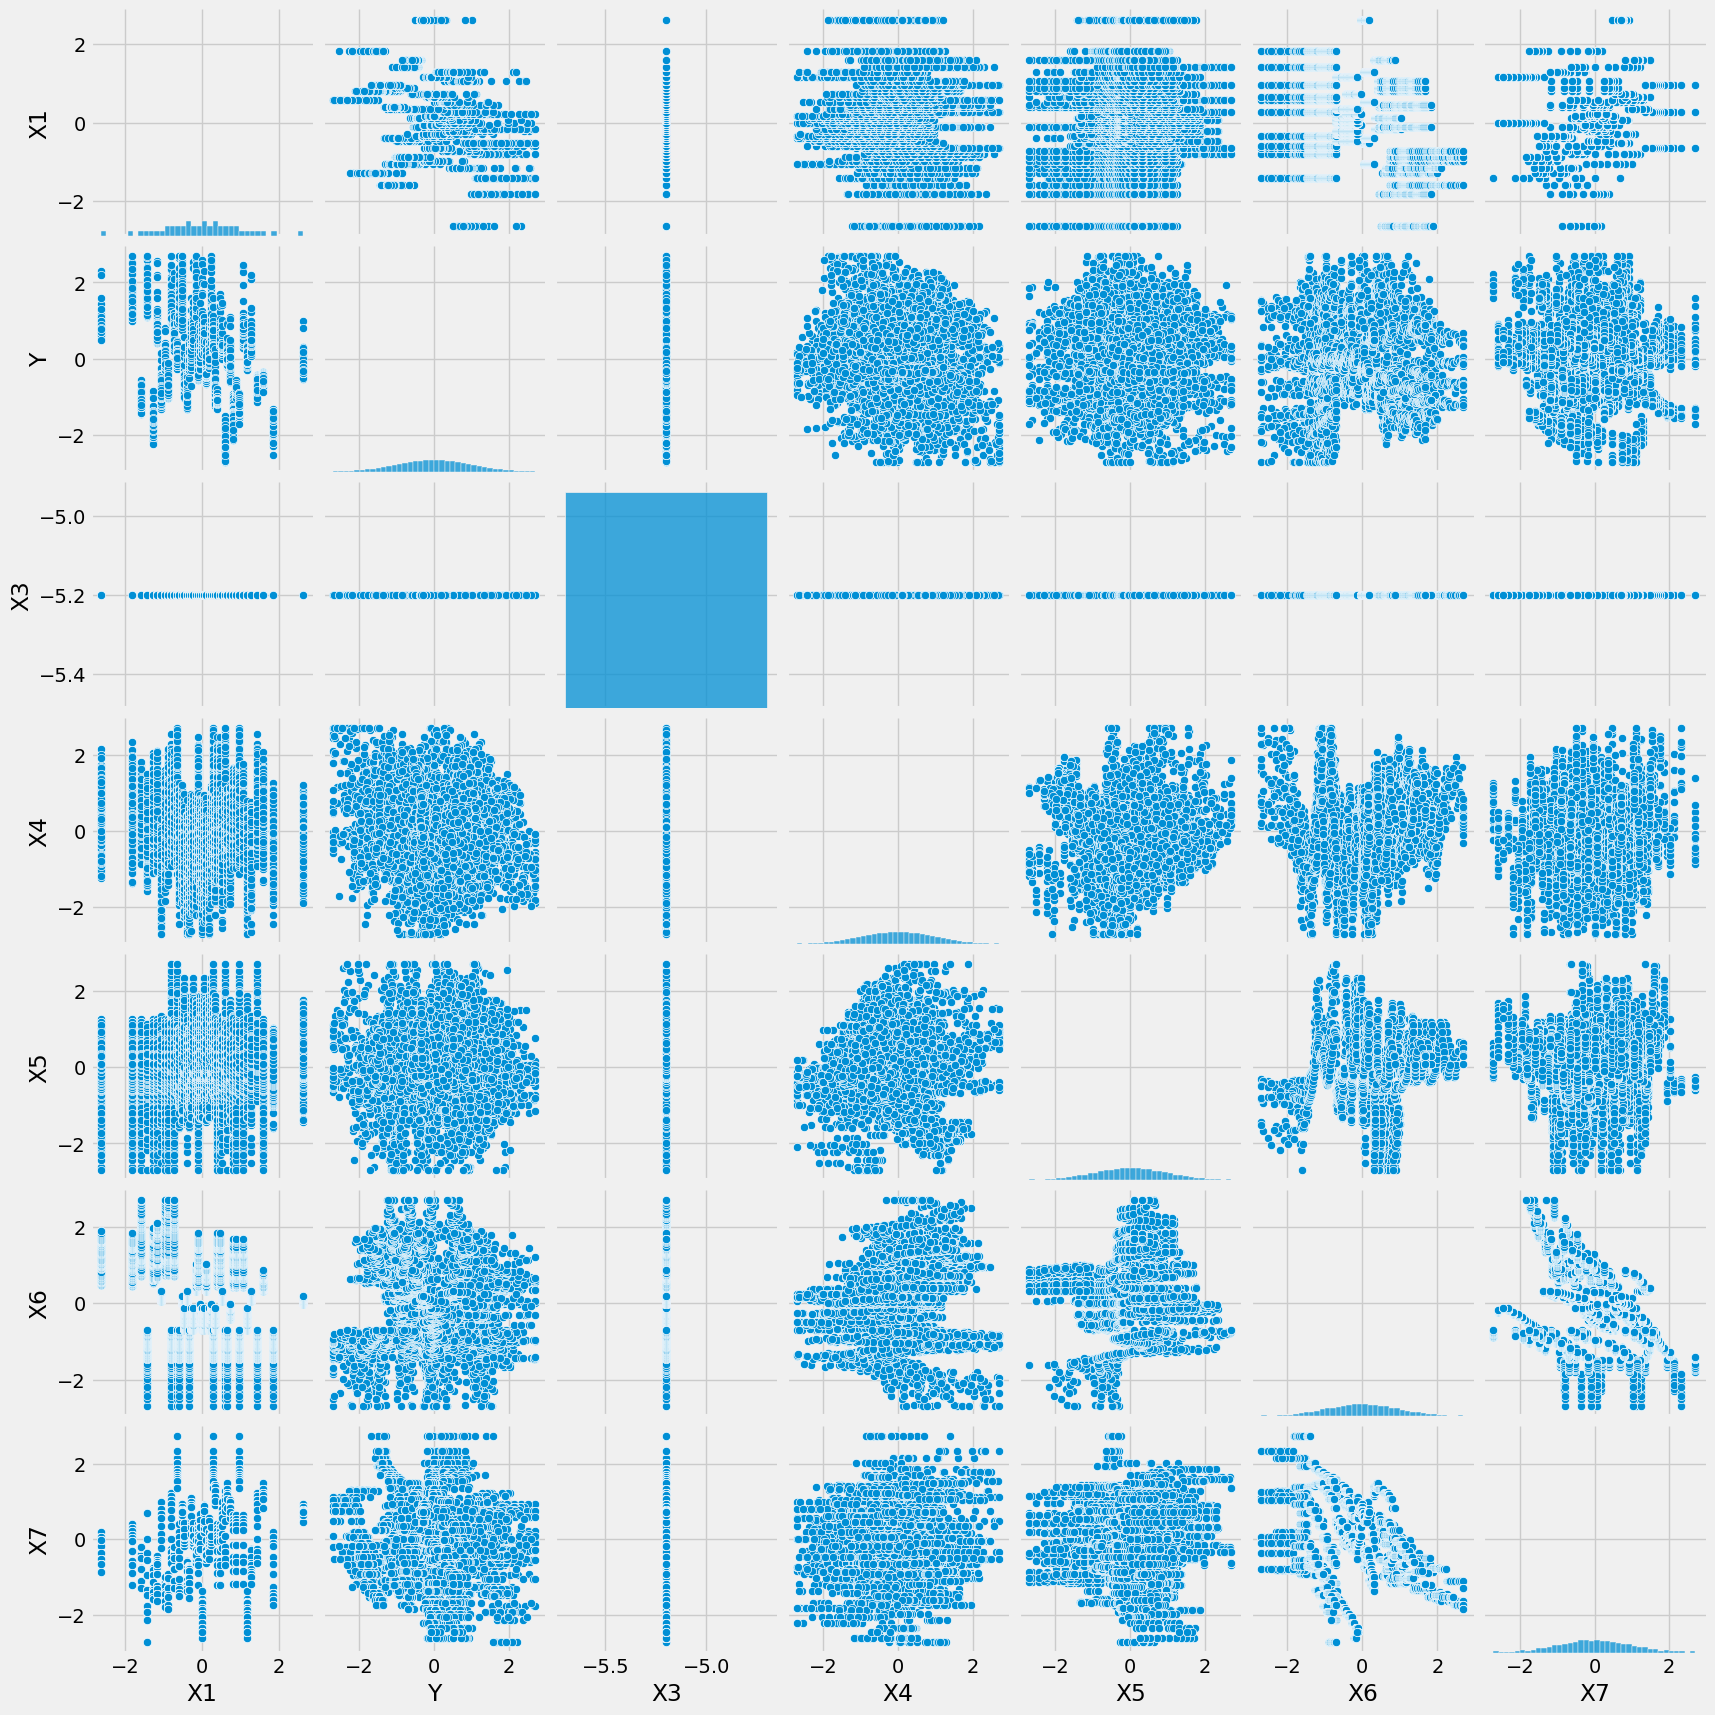

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



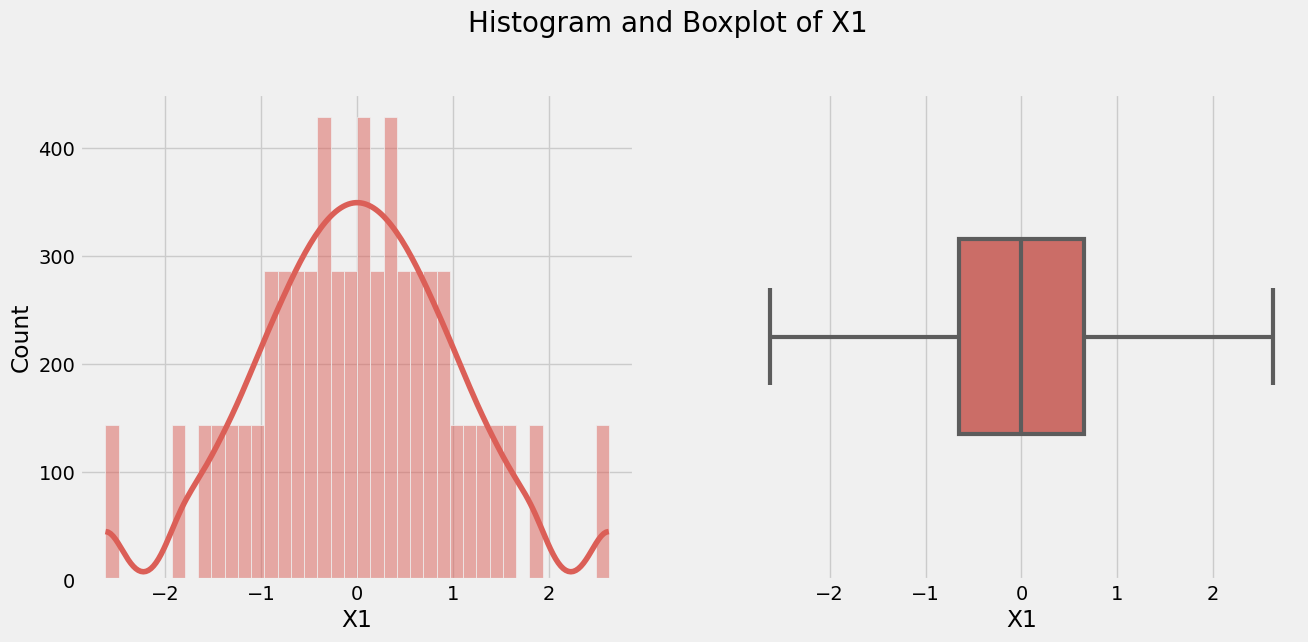

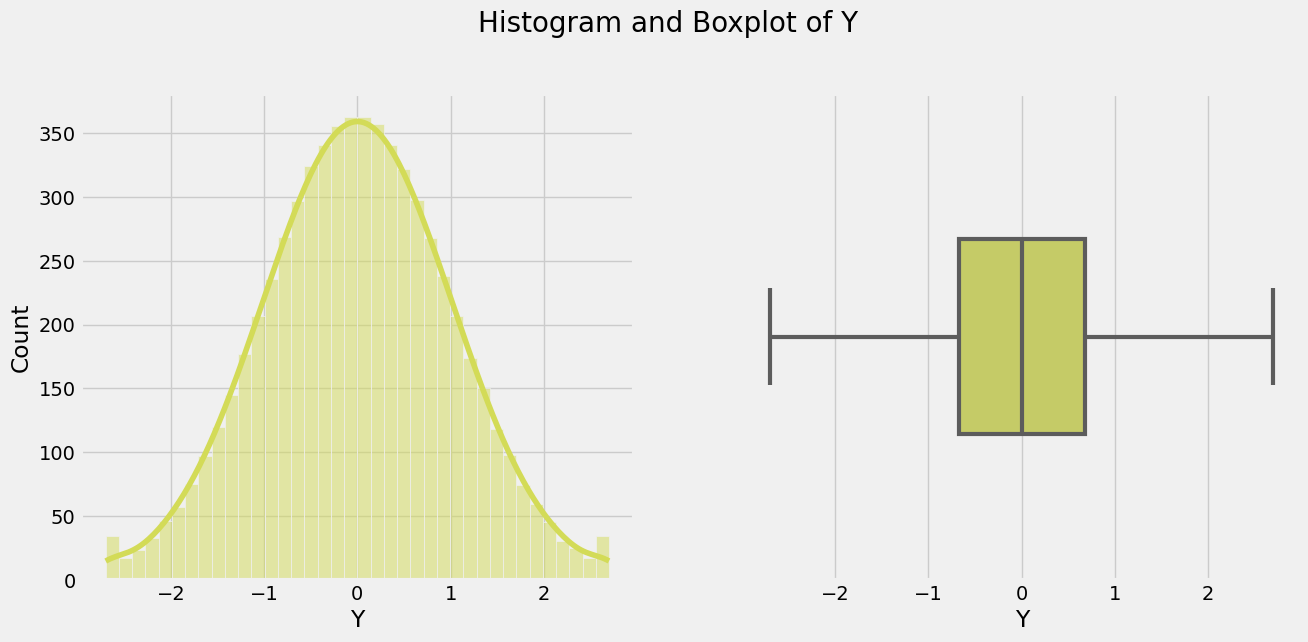

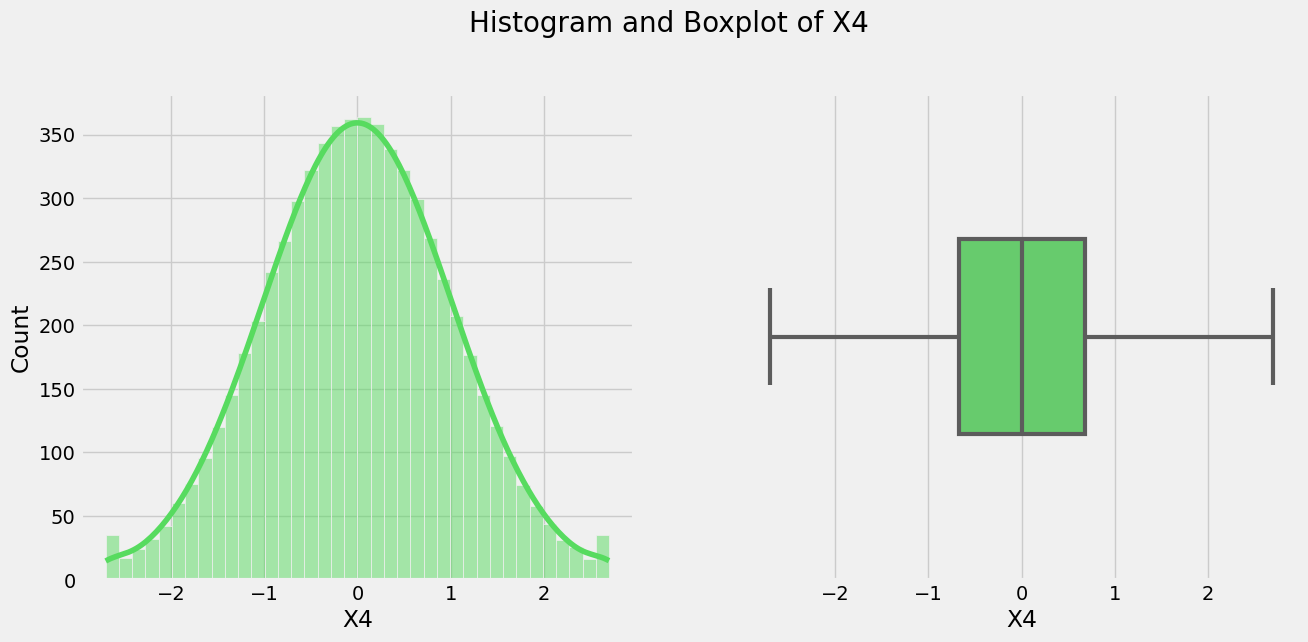

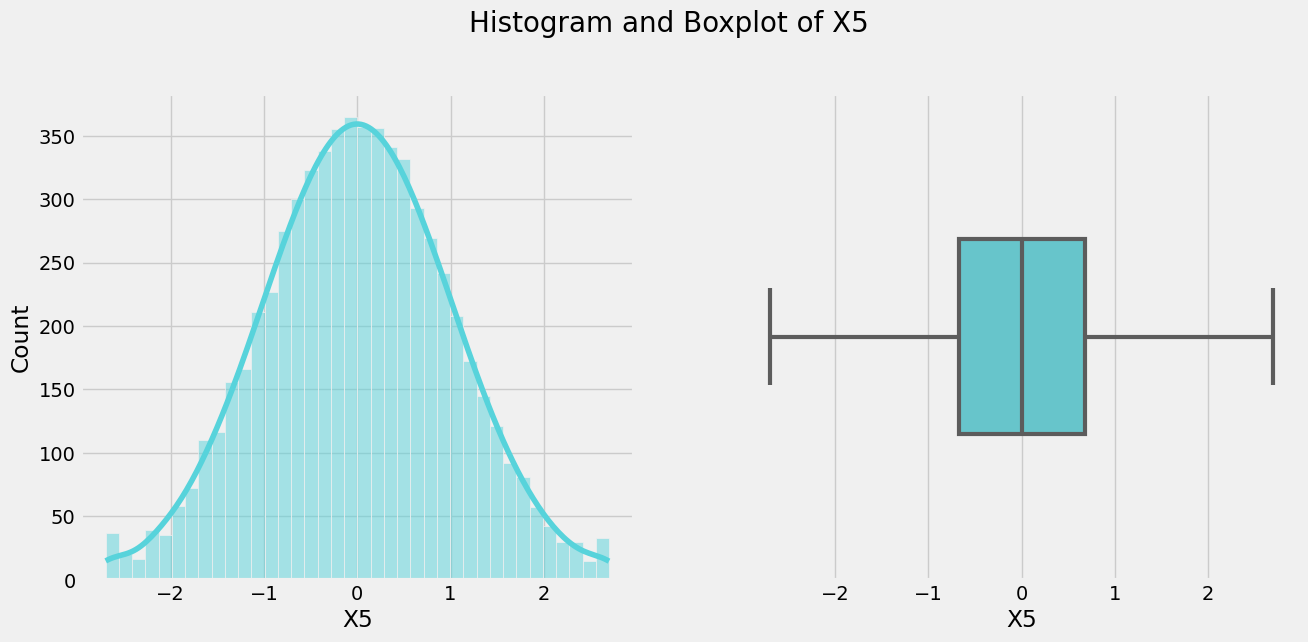

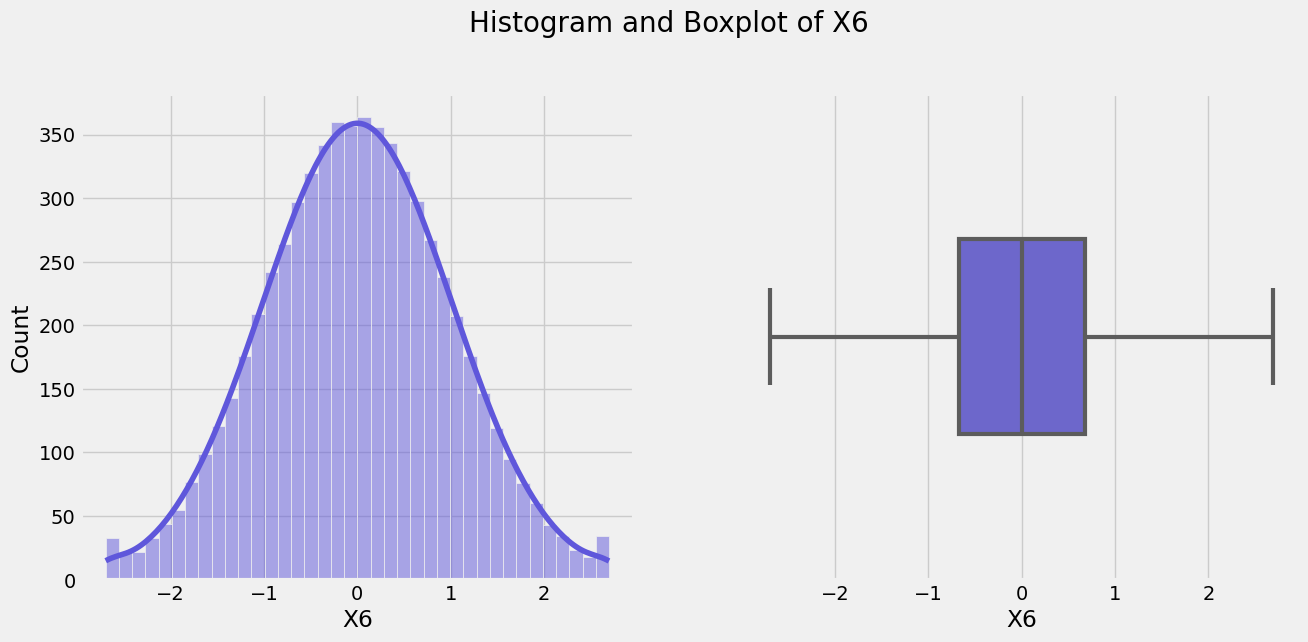

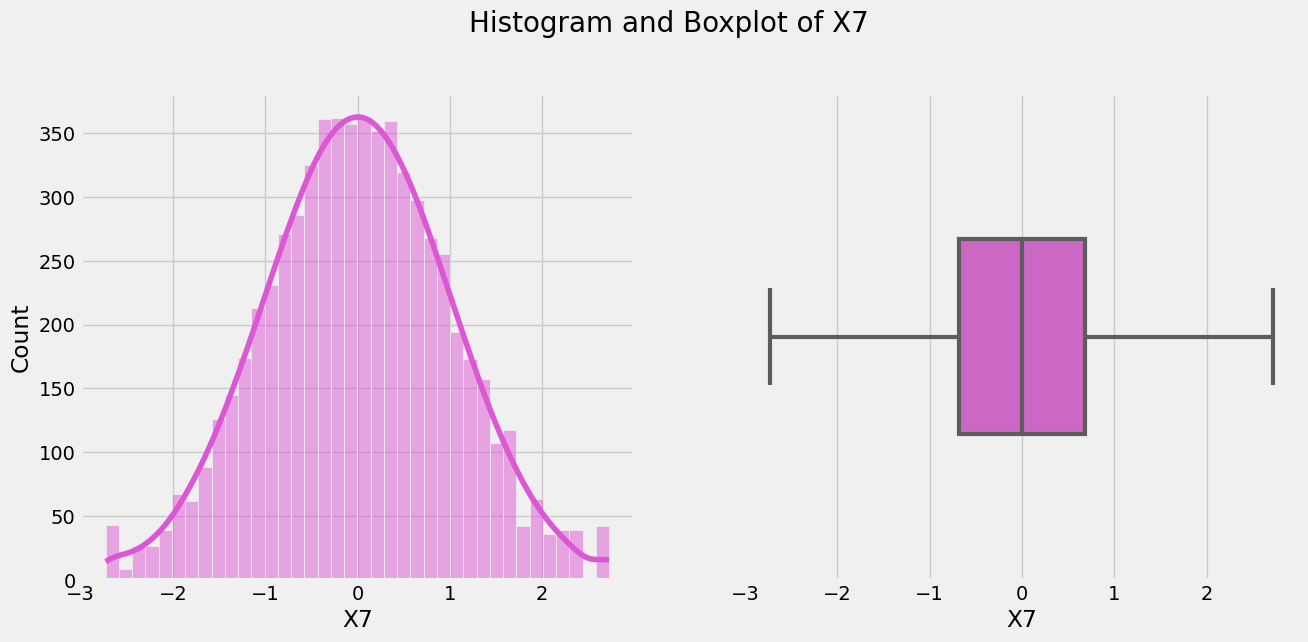

----------------------------------------------------------------------------------------------------
Countplot(s):



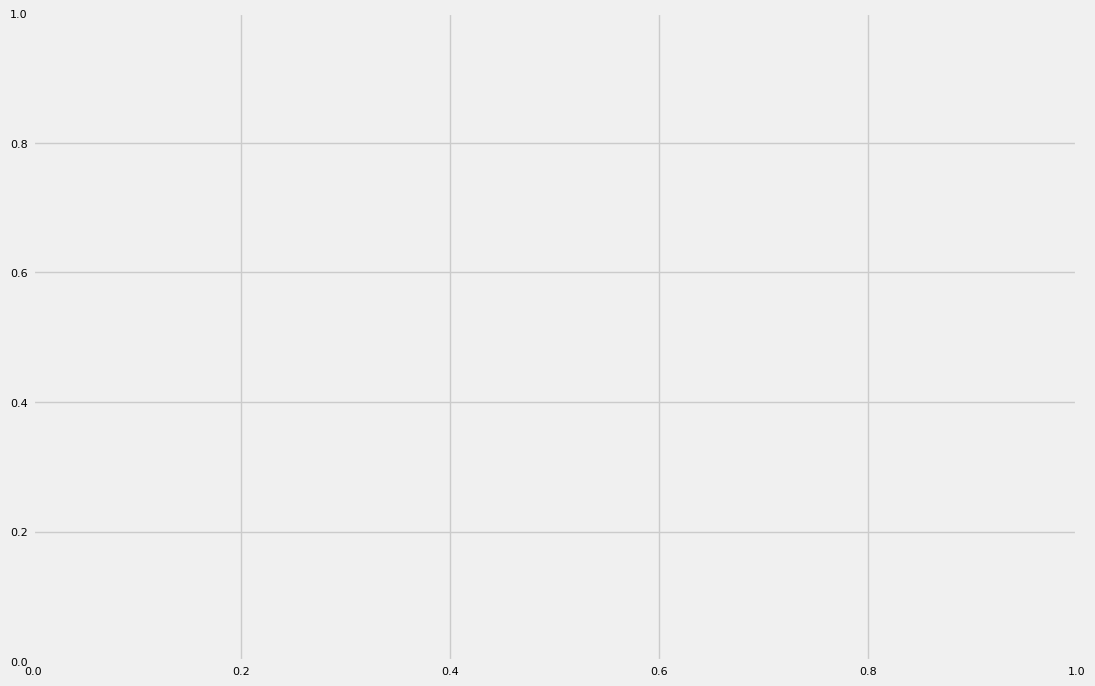

In [ ]:
fast_eda(df)